<a href="https://colab.research.google.com/github/parasgulati8/People-Analytics/blob/Scaling/People_Analytics_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import itertools
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

pd.options.display.max_columns = 100

## Import Data

In [0]:
data = pd.read_excel('drive/My Drive/Colab Notebooks/dataset/Health_Care_Data_train.xlsx')

In [147]:
data.head()

,Group,Specialty,physician,verysat,q1,q2,q3,q5,q6,q7,q9,q10,q11,q12,q13,q14,q16,q17,q18,q19,q20,q27,q34,q35,q37,q38,q45,q46,q47,q48,q50,q51,q53,q54,q55,q56,q57,q58
0,A,Other,1,0.0,5.0,2.0,2.0,4.0,1.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,3.0,2.0,2.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,1.0,5.0,2.0,2.0,3.0,3.0,5.0,5.0,5.0,3.0,3.0,3.0
1,A,Other,1,0.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,1.0,4.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,4.0,4.0,3.0,2.0,4.0,4.0,4.0,3.0,3.0,5.0,4.0,1.0,3.0,3.0,2.0
2,A,Other,1,0.0,5.0,5.0,4.0,4.0,4.0,3.0,5.0,4.0,4.0,5.0,3.0,5.0,4.0,4.0,5.0,3.0,3.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,3.0,3.0,5.0,3.0,2.0
3,A,Other,1,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0
4,A,Primary_Care,1,0.0,3.0,1.0,1.0,2.0,1.0,3.0,4.0,1.0,4.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,4.0,3.0,1.0,4.0,1.0,5.0,3.0,3.0,5.0,5.0,1.0,3.0,1.0,3.0


In [0]:
data.describe()

,physician,verysat,q1,q2,q3,q5,q6,q7,q9,q10,q11,q12,q13,q14,q16,q17,q18,q19,q20,q27,q34,q35,q37,q38,q45,q46,q47,q48,q50,q51,q53,q54,q55,q56,q57,q58
count,1100.000000,1093.000000,1094.000000,1089.000000,1094.000000,1097.000000,1083.000000,1089.000000,1093.000000,1090.000000,1074.000000,1082.000000,1082.000000,1089.000000,1092.000000,1092.000000,1092.000000,1092.000000,1069.000000,1087.000000,1096.000000,1093.000000,1091.000000,1091.000000,1088.000000,1087.000000,1085.000000,1088.000000,1088.000000,1089.000000,1092.000000,1091.000000,1086.000000,1090.000000,1086.000000,1091.000000
mean,0.911818,0.288198,4.469835,3.425161,3.705667,3.710119,3.287165,4.173554,4.535224,3.675229,3.865922,4.222736,4.337338,3.703398,3.427656,3.601648,3.289377,3.065018,3.037418,4.382705,3.354015,3.886551,4.169569,3.766269,2.003676,3.956762,3.787097,4.144301,3.860294,3.943985,2.808608,2.766269,3.000921,3.676147,3.731123,1.876260
std,0.283688,0.453131,0.776192,1.297676,1.178189,1.202119,1.256293,0.979664,0.655977,1.038749,0.837547,0.844704,0.897046,1.293791,1.376537,1.277212,1.324713,1.324653,1.287546,0.796398,1.291575,1.017220,0.888060,1.045479,0.907895,0.899646,0.951702,0.847283,1.076967,0.924336,1.233878,1.198393,1.237285,0.998014,1.116895,1.030852
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,0.000000,4.000000,2.000000,3.000000,3.000000,2.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,4.000000,2.000000,4.000000,4.000000,3.000000,1.000000,4.000000,3.000000,4.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,1.000000
50%,1.000000,0.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,5.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,2.000000
75%,1.000000,1.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,5.000000,5.000000,2.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,2.000000
max,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Data Preprocessing

Three Approaches :
- Drop the rows with Null values
- Replace them with mean
- Replace them with Median

### Imputing the NaN with median values and non numeric values 

In [4]:
data.isna().sum()

Group         0
Specialty     0
physician     0
verysat       7
q1            6
q2           11
q3            6
q5            3
q6           17
q7           11
q9            7
q10          10
q11          26
q12          18
q13          18
q14          11
q16           8
q17           8
q18           8
q19           8
q20          31
q27          13
q34           4
q35           7
q37           9
q38           9
q45          12
q46          13
q47          15
q48          12
q50          12
q51          11
q53           8
q54           9
q55          14
q56          10
q57          14
q58           9
dtype: int64

In [0]:
data.dropna(inplace=True)

### Using K fold Cross Validation

In [0]:
def get_folds(X,y, k=5):
    return list(StratifiedKFold(n_splits=k, shuffle=True, random_state=1).split(X, y))

In [0]:
dummy = pd.get_dummies(data['Specialty'])
dummy1 = pd.get_dummies(data['Group'])

In [0]:
# df = pd.concat([dummy, dummy1, new_data], axis = 1)

df = pd.concat([dummy, dummy1, data], axis = 1)

In [8]:
df.head()

,Non_MD,Other,Primary_Care,Specialist,Surgical,A,B,C,D,E,F,G,H,Group,Specialty,physician,verysat,q1,q2,q3,q5,q6,q7,q9,q10,q11,q12,q13,q14,q16,q17,q18,q19,q20,q27,q34,q35,q37,q38,q45,q46,q47,q48,q50,q51,q53,q54,q55,q56,q57,q58
0,0,1,0,0,0,1,0,0,0,0,0,0,0,A,Other,1,0.0,5.0,2.0,2.0,4.0,1.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,3.0,2.0,2.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,1.0,5.0,2.0,2.0,3.0,3.0,5.0,5.0,5.0,3.0,3.0,3.0
1,0,1,0,0,0,1,0,0,0,0,0,0,0,A,Other,1,0.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,1.0,4.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,4.0,4.0,3.0,2.0,4.0,4.0,4.0,3.0,3.0,5.0,4.0,1.0,3.0,3.0,2.0
2,0,1,0,0,0,1,0,0,0,0,0,0,0,A,Other,1,0.0,5.0,5.0,4.0,4.0,4.0,3.0,5.0,4.0,4.0,5.0,3.0,5.0,4.0,4.0,5.0,3.0,3.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,3.0,3.0,5.0,3.0,2.0
3,0,1,0,0,0,1,0,0,0,0,0,0,0,A,Other,1,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0
4,0,0,1,0,0,1,0,0,0,0,0,0,0,A,Primary_Care,1,0.0,3.0,1.0,1.0,2.0,1.0,3.0,4.0,1.0,4.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,4.0,3.0,1.0,4.0,1.0,5.0,3.0,3.0,5.0,5.0,1.0,3.0,1.0,3.0


In [0]:
df = df.drop(columns=['Group', 'Specialty'], axis=1)

In [0]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [0]:
folds = get_folds(X, y)

### Scaling the data

In [12]:
df.head()

,Non_MD,Other,Primary_Care,Specialist,Surgical,A,B,C,D,E,F,G,H,physician,verysat,q1,q2,q3,q5,q6,q7,q9,q10,q11,q12,q13,q14,q16,q17,q18,q19,q20,q27,q34,q35,q37,q38,q45,q46,q47,q48,q50,q51,q53,q54,q55,q56,q57,q58
0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0.0,5.0,2.0,2.0,4.0,1.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,3.0,2.0,2.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,1.0,5.0,2.0,2.0,3.0,3.0,5.0,5.0,5.0,3.0,3.0,3.0
1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,1.0,4.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,4.0,4.0,3.0,2.0,4.0,4.0,4.0,3.0,3.0,5.0,4.0,1.0,3.0,3.0,2.0
2,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0.0,5.0,5.0,4.0,4.0,4.0,3.0,5.0,4.0,4.0,5.0,3.0,5.0,4.0,4.0,5.0,3.0,3.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,3.0,3.0,5.0,3.0,2.0
3,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0
4,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0.0,3.0,1.0,1.0,2.0,1.0,3.0,4.0,1.0,4.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,4.0,3.0,1.0,4.0,1.0,5.0,3.0,3.0,5.0,5.0,1.0,3.0,1.0,3.0


In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
X_train, X_test, y_train, y_test = [], [], [], []

for fold in folds:
  X_train.append(X.values[fold[0]])
  X_test.append(X.values[fold[1]])
  y_train.append(y.values[fold[0]])
  y_test.append(y.values[fold[1]])
                 

In [15]:
for i in range(5):
  scaler = StandardScaler()
  X_train[i] = scaler.fit_transform(X_train[i])
  X_test[i] = scaler.transform(X_test[i])

ERROR! Session/line number was not unique in database. History logging moved to new session 59


### How many unique elements in Specialty and Group Column

In [0]:
np.unique(data['Specialty'])

array(['Non_MD', 'Other', 'Primary_Care', 'Specialist', 'Surgical'],
      dtype=object)

In [0]:
np.unique(data1['Group'])

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype=object)

In [0]:
np.unique(data1['q58'])

array([1., 2., 3., 4., 5.])

# KNN

Fold =  0


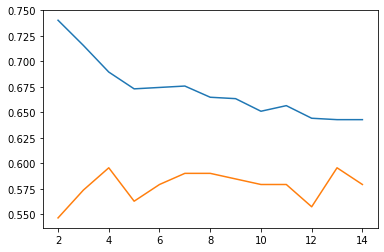

Fold =  1


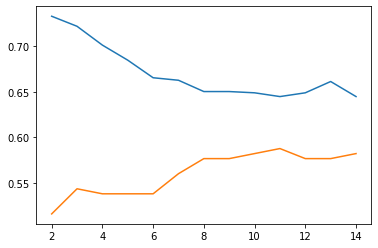

Fold =  2


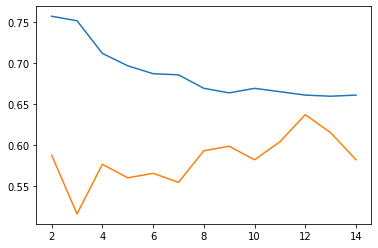

Fold =  3


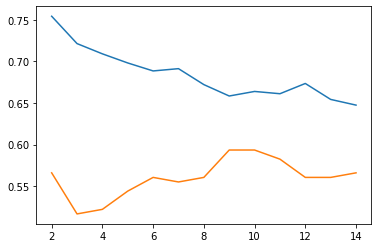

Fold =  4


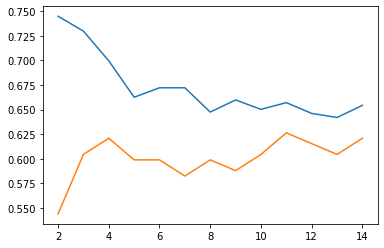

In [21]:
accuracies = []
accuracies_test = []
for j in range(5):
    print('Fold = ',j)  
    acc = []
    acc_test = []
    for i in range(2,15):
        knn = KNeighborsClassifier(i)
        knn.fit(X_train[j], y_train[j])
        acc.append(accuracy_score(y_train[j], knn.predict(X_train[j])))
        acc_test.append(accuracy_score(y_test[j], knn.predict(X_test[j])))
        
    plt.figure()
    plt.plot(range(2,15), acc)
    plt.plot(range(2,15), acc_test)
    plt.show()

    accuracies.append(acc)
    accuracies_test.append(acc_test)

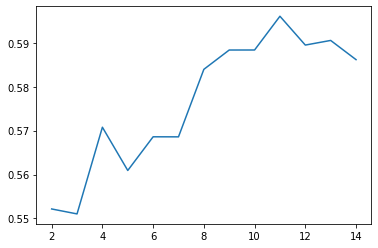

In [22]:
avg = []
for i in range(len(accuracies_test[0])):
  avg.append(sum([j[i] for j in accuracies_test])/5)

plt.plot(range(2,15), avg)

In [23]:
i = 0
dic = {}
for j in range(2,15):
  dic[j] = avg[i]
  i = i+1

dic[11]

0.5960667747552993

# Random Forest 

Fold =  0


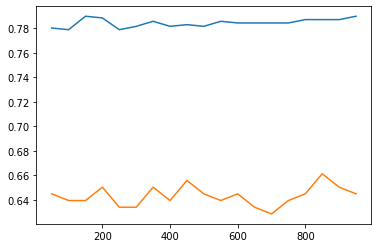

Fold =  1


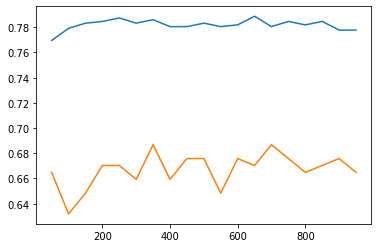

Fold =  2


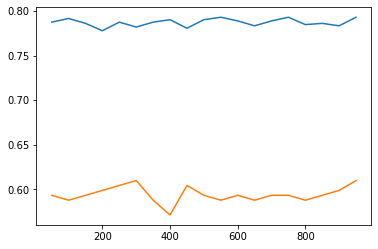

Fold =  3


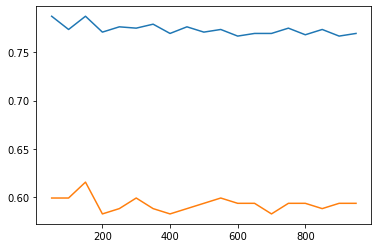

Fold =  4


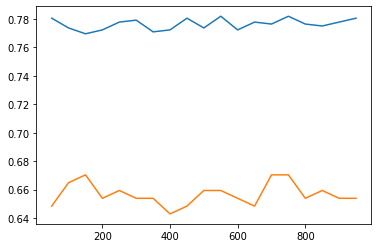

In [24]:
accuracies = []
accuracies_test = []

for j in range(5):
    # X_train, X_test, y_train, y_test = X.iloc[fold[0], :], X.iloc[fold[1], :], y.iloc[fold[0]], y.iloc[fold[1]]
    print ('Fold = ', j)
    acc = []
    acc_test = []
    for i in range(50,1000,50):
        rfc = RandomForestClassifier(i, max_leaf_nodes=32)
        rfc.fit(X_train[j], y_train[j])
        acc.append(accuracy_score(y_train[j], rfc.predict(X_train[j])))
        acc_test.append(accuracy_score(y_test[j], rfc.predict(X_test[j])))
    
    plt.figure()
    plt.plot(range(50,1000,50), acc)
    plt.plot(range(50,1000,50), acc_test)
    plt.show()

    accuracies.append(acc)
    accuracies_test.append(acc_test)

In [0]:
# Finding average accuracy for each random classifier across 5 folds

avg = []
for i in range(len(accuracies_test[0])):
  avg.append(sum([j[i] for j in accuracies_test])/5) 


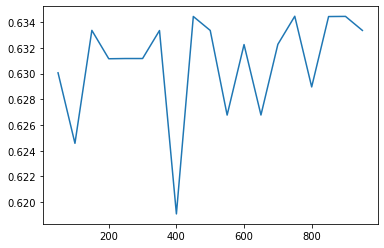

In [26]:
plt.plot(range(50,1000,50), avg)

In [30]:
i = 0
dic = {}
for j in range(50,1000,50):
  dic[j] = avg[i]
  i = i+1

dic[850] # 0.6333573530294843 for 500

0.6344382393562722

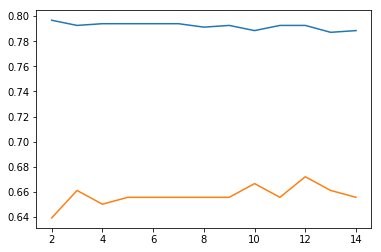

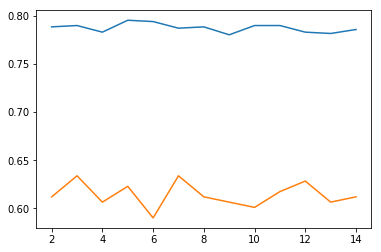

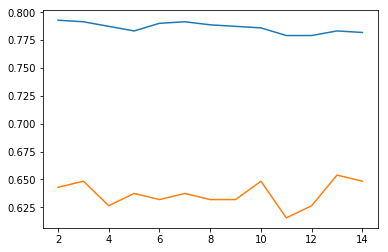

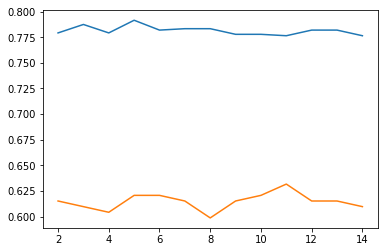

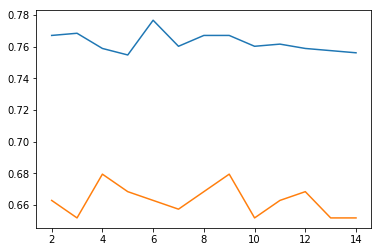

In [0]:
for fold in folds:
    X_train, X_test, y_train, y_test = X.iloc[fold[0], :], X.iloc[fold[1], :], y.iloc[fold[0]], y.iloc[fold[1]]
    
    acc = []
    acc_test = []
    for i in range(2,15):
        rfc = RandomForestClassifier(300, max_leaf_nodes=32, min_samples_split= i)
        rfc.fit(X_train, y_train)
        acc.append(accuracy_score(y_train, rfc.predict(X_train)))
        acc_test.append(accuracy_score(y_test, rfc.predict(X_test)))

    plt.figure()
    plt.plot(range(2,15), acc)
    plt.plot(range(2,15), acc_test)
    plt.show()

# Deep Learning

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, ReLU, PReLU
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.initializers import glorot_uniform

In [32]:
for i in range(5):
  y_train[i] = pd.get_dummies(y_train[i]).values
  y_test[i] = pd.get_dummies(y_test[i]).values

ERROR! Session/line number was not unique in database. History logging moved to new session 60


In [27]:
model = Sequential()
model.add(Dense(8, activation='sigmoid', input_dim=48, kernel_initializer=glorot_uniform(seed=42)))
model.add(Dense(16, activation='sigmoid', kernel_initializer=glorot_uniform(seed=42)))
model.add(Dense(5, activation='softmax', kernel_initializer=glorot_uniform(seed=42)))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 196       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 55        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [35]:
for i in range(5):
  model = Sequential()
  model.add(Dense(4, activation='sigmoid', input_dim=48, kernel_initializer=glorot_uniform(seed=42)))
  model.add(Dense(10, activation='sigmoid', kernel_initializer=glorot_uniform(seed=42)))
  model.add(Dense(5, activation='softmax', kernel_initializer=glorot_uniform(seed=42)))

  # X_train, X_test, y_train, y_test = X.iloc[fold[0], :], X.iloc[fold[1], :], y.iloc[fold[0]], y.iloc[fold[1]]
  # y_train = pd.get_dummies(y_train).values
  # y_test = pd.get_dummies(y_test).values

  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  # mc = ModelCheckpoint('drive/My Drive/Colab Notebooks/dataset/model'+str(i)+'.h5', monitor='val_accuracy', save_best_only=True)
  model.fit(X_train[i], y_train[i], epochs=200, validation_data=(X_test[i], y_test[i])) #, callbacks=[mc])

Epoch 1/200
23/23 [==============================] - 0s 8ms/step - loss: 1.3731 - accuracy: 0.4093 - val_loss: 1.3461 - val_accuracy: 0.4754
Epoch 2/200
23/23 [==============================] - 0s 3ms/step - loss: 1.3060 - accuracy: 0.4780 - val_loss: 1.2918 - val_accuracy: 0.4754
Epoch 3/200
23/23 [==============================] - 0s 3ms/step - loss: 1.2621 - accuracy: 0.4780 - val_loss: 1.2541 - val_accuracy: 0.4754
Epoch 4/200
23/23 [==============================] - 0s 3ms/step - loss: 1.2322 - accuracy: 0.4780 - val_loss: 1.2291 - val_accuracy: 0.4754
Epoch 5/200
23/23 [==============================] - 0s 3ms/step - loss: 1.2074 - accuracy: 0.4780 - val_loss: 1.2102 - val_accuracy: 0.4754
Epoch 6/200
23/23 [==============================] - 0s 3ms/step - loss: 1.1880 - accuracy: 0.4780 - val_loss: 1.1945 - val_accuracy: 0.4754
Epoch 7/200
23/23 [==============================] - 0s 3ms/step - loss: 1.1749 - accuracy: 0.4780 - val_loss: 1.1799 - val_accuracy: 0.4754
Epoch 8/200
2